In [151]:
import numpy as np
from matplotlib import pyplot as plt

In [201]:
column_num=563
rule_num=32
contributions_up=[]
for i in range(rule_num):
    contributions_up.append([0]*column_num)
t=[]
rules={}

In [202]:
rule_names=['rule_diffusion_polymer',
'rule_TT_polymerize_horizontal_plus', 'rule_depolymerize_plus_TT', 'rule_depolymerize_plus_TD', 'rule_depolymerize_plus_DD',
'rule_annealing_TT', 'rule_annealing_TD',
'rule_fragmentate_TT', 'rule_fragmentate_TD', 'rule_fragmentate_DD',
'rule_bundling', 'rule_debundling', 'rule_attatch', 'rule_anchoring', 'rule_deanchoring',
'rule_hydrolysis_TTT', 'rule_hydrolysis_TTD', 'rule_hydrolysis_DTD',
'rule_empty_anchor_diffusion',
'rule_rotation',
'rule_TT_polymerize_vertical_plus',
'rule_bundling_inverse',
'rule_debundling_inverse',
'rule_TT_polymerize_horizontal_minus',
'rule_TT_polymerize_vertical_minus',
'rule_TD_polymerize_vertical_plus',
'rule_TD_polymerize_vertical_minus',
'rule_TD_polymerize_horizontal_plus',
'rule_TD_polymerize_horizontal_minus',
'rule_depolymerize_minus_TT', 'rule_depolymerize_minus_TD', 'rule_depolymerize_minus_DD']
rule_names=np.array(rule_names)

In [238]:
rule_names[9]

'rule_fragmentate_DD'

In [16]:
len(contributions)

31

In [247]:
column_num=563
rule_num=32
contributions_up=[]
contributions_down=[]
for i in range(rule_num):
    contributions_up.append([0]*column_num)
    contributions_down.append([0]*column_num)
t=[]
rules={}
filename='propensity_statistics_up.txt'
file=open(filename,'r')
data=file.readline()
while(data):
    data=data.split()
    t.append(data[0])
    rule=int(data[1])
    if rule not in rules:
        rules[rule]=1
    else:
        rules[rule]+=1
    for index in range(2,len(data),2):
        contributions_up[rule][int(data[index])]+=float(data[index+1])
#         print(rule,int(data[index]),float(data[index+1]))
#         if rule==12 and float(data[index+1])>0:
#             print(data[0],data[index+1])
#     print(rule)
    data=file.readline()
        
# print(data)
file.close()

column_num=563
rule_num=32



filename='propensity_statistics_down.txt'
file=open(filename,'r')
data=file.readline()
while(data):
    data=data.split()
    t.append(data[0])
    rule=int(data[1])
    
    for index in range(2,len(data),2):
        contributions_down[rule][int(data[index])]+=float(data[index+1])
#         print(rule,int(data[index]),float(data[index+1]))
#     print(rule)
    data=file.readline()
        
# print(data)
file.close()

In [217]:
rules

{20: 14, 14: 12, 12: 13, 25: 2}

In [138]:
if 14 in rules:
    del rules[14]#del deanchoring
if 12 in rules:
    del rules[12]#del attatch
if 6 in rules:
    del rules[6]#del annealing_TD

Text(0,0.5,'accumulated propensity change')

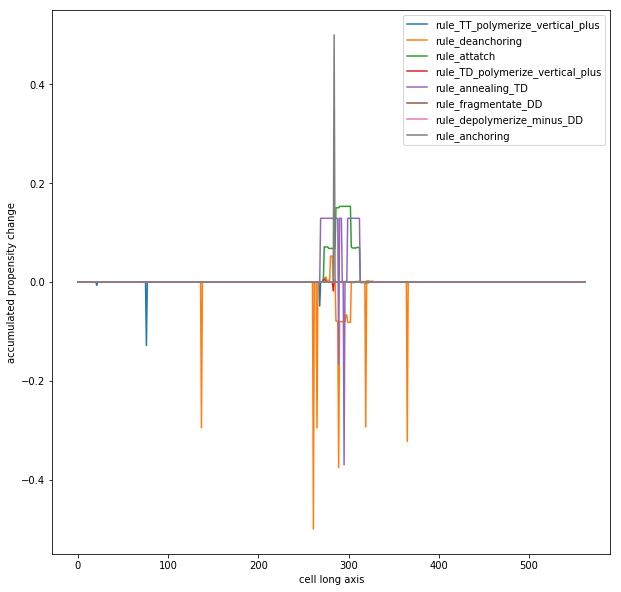

In [248]:
plt.figure(figsize=[10,10])
for i in rules.keys():
    plt.plot(range(column_num),contributions_up[i],label=rule_names[i])
plt.legend()
plt.xlabel('cell long axis')
plt.ylabel('accumulated propensity change')


Text(0,0.5,'accumulated propensity change')

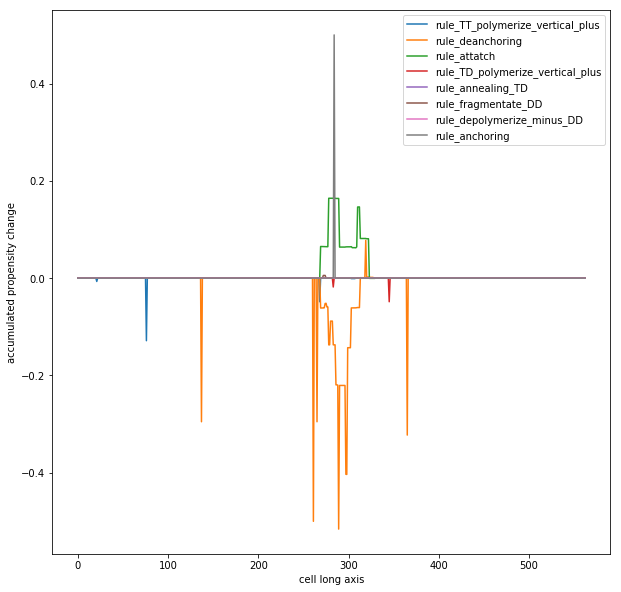

In [249]:
plt.figure(figsize=[10,10])
for i in rules.keys():
    plt.plot(range(column_num),contributions_down[i],label=rule_names[i])
plt.legend()
plt.xlabel('cell long axis')
plt.ylabel('accumulated propensity change')

Text(0,0.5,'accumulated propensity change')

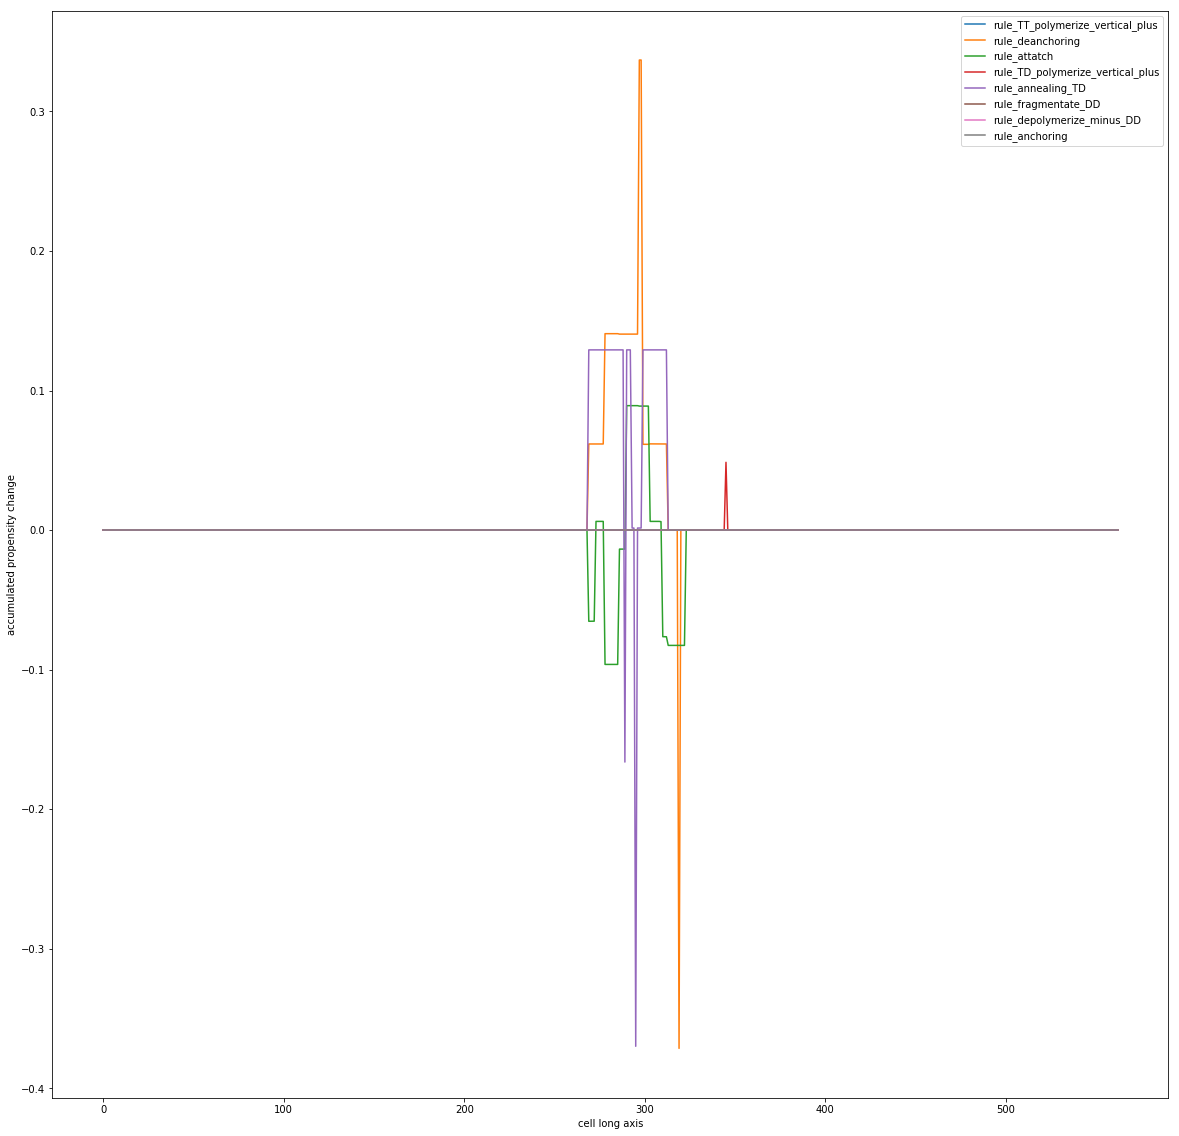

In [250]:
contributions_up=np.array(contributions_up)
contributions_down=np.array(contributions_down)
contributions=contributions_up-contributions_down
plt.figure(figsize=[20,20])
for i in rules.keys():
    plt.plot(range(column_num),contributions[i],label=rule_names[i])
plt.legend()
plt.xlabel('cell long axis')
plt.ylabel('accumulated propensity change')

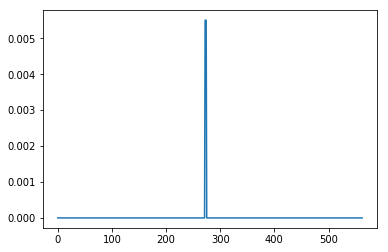

In [242]:
plt.plot(range(column_num),contributions_down[9],label=rule_names[9])

In [169]:
contribution_sum=np.sum(contributions,axis=1)

In [182]:
contribution_sum_plus=contribution_sum[contribution_sum>0]
rule_names_plus=rule_names[contribution_sum>0]
contribution_sum_minus=contribution_sum[contribution_sum<0]
rule_names_minus=rule_names[contribution_sum<0]

In [178]:
contribution_sum_cleaned

array([-1.20599843e+01, -2.03829300e-01,  5.69901690e+01,  1.02332788e+02,
       -1.80407004e+01, -7.50518452e+01, -2.32523674e-02, -3.33231640e-03,
        3.66373011e+01])

([<matplotlib.patches.Wedge at 0x2983e3502b0>,
 [Text(0.671942,0.870915,'rule_fragmentate_DD'),
  Text(-1.04196,-0.352587,'rule_attatch'),
  Text(0.915647,-0.609583,'rule_depolymerize_minus_DD')])

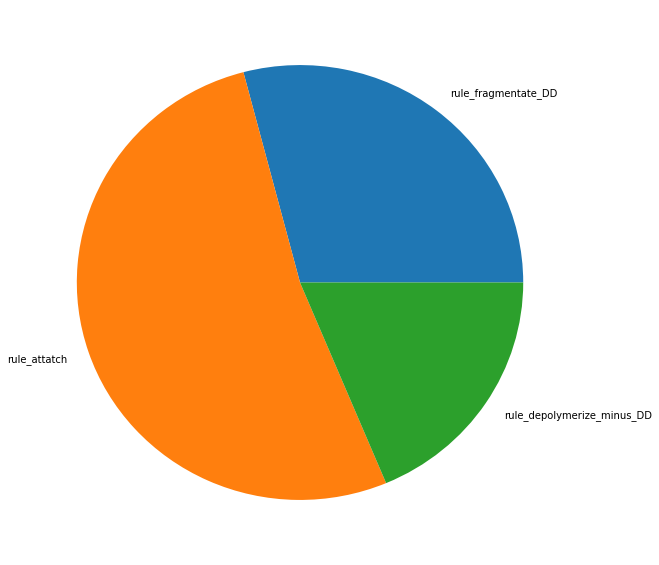

In [181]:
plt.figure(figsize=[10,10])
plt.pie(contribution_sum_plus,labels=rule_names_plus)

([<matplotlib.patches.Wedge at 0x2983e3cf828>,
 [Text(1.02967,0.38701,'rule_annealing_TD'),
  Text(0.823261,0.729549,'rule_fragmentate_TD'),
  Text(0.326946,1.05029,'rule_anchoring'),
  Text(-0.68151,-0.863449,'rule_deanchoring'),
  Text(1.1,-0.000981272,'rule_TT_polymerize_vertical_plus'),
  Text(1.1,-0.000109498,'rule_TD_polymerize_vertical_plus')])

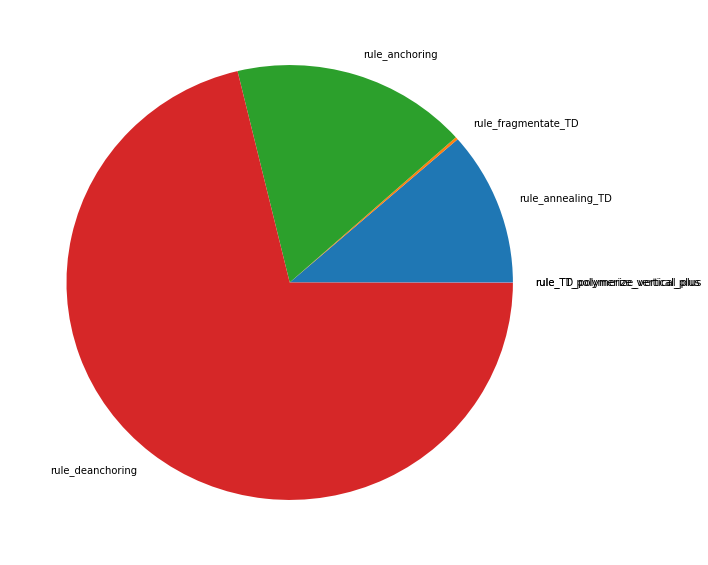

In [184]:
plt.figure(figsize=[10,10])
plt.pie(abs(contribution_sum_minus),labels=rule_names_minus)

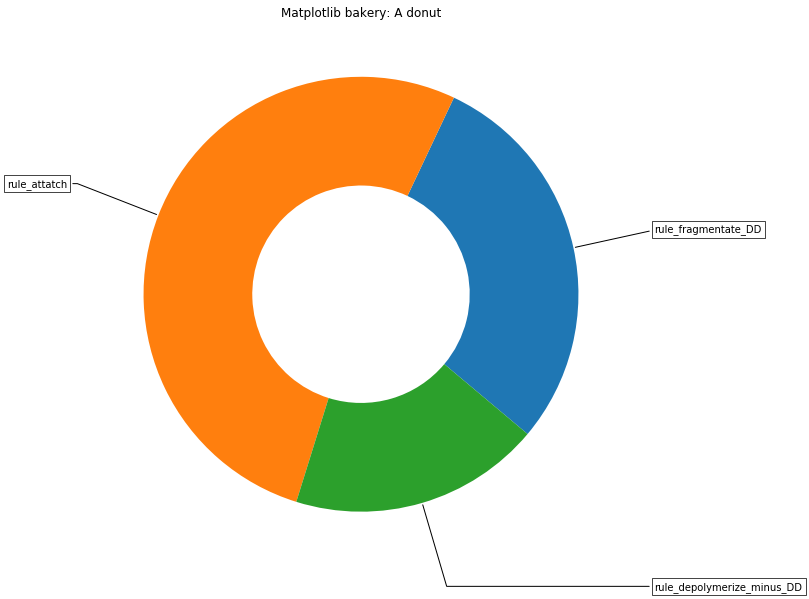

In [194]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))



wedges, texts = ax.pie(abs(contribution_sum_plus), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(rule_names_plus[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

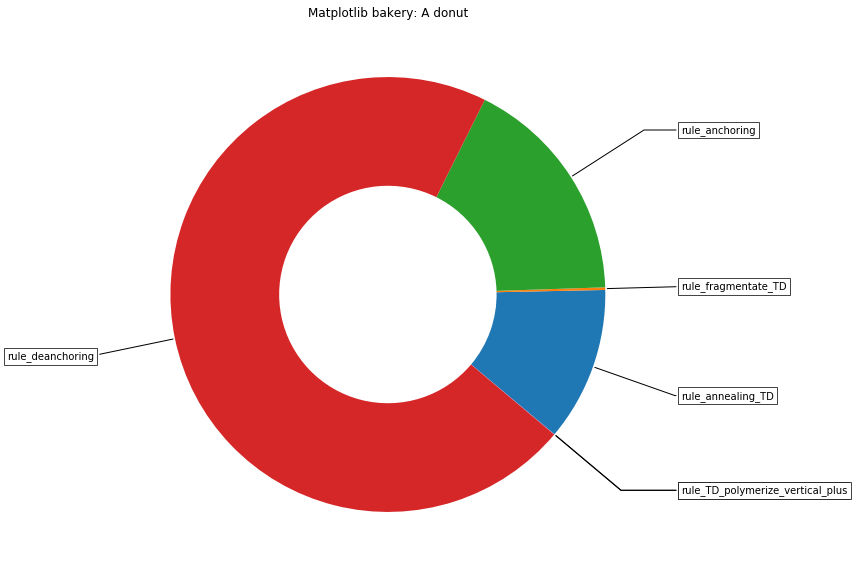

In [193]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))



wedges, texts = ax.pie(abs(contribution_sum_minus), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(rule_names_minus[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

<BarContainer object of 3 artists>

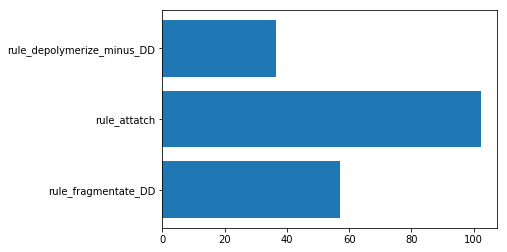

In [189]:
plt.barh(range(len(contribution_sum_plus)),contribution_sum_plus,tick_label=rule_names_plus)